# Analysis and Visualization of Complex Agro-Environmental Data
---
## Checking probability distributions
### Normality tests

To follow the most appropriate statistical methods (e.g. hypothesis testing or statistical modelling approach), it is often important to test whether variables can be assumed to follow a normal distibution. If the used methods assume a Gaussian distribution but your data was drawn from a different distribution, the findings may be misleading or simply wrong.

The first commonly way of quickly checking the distribution of a sample of data is to plot a histogram.
However, a more informative visualization is to plot a normal QQ plot, that plots the quantiles of each data value against theoretical quantiles corresponding to equal probability intervals of the standard normal distribution *N*(0,1). If most points fall near the diagonal line of the plot, then the distribution of data approximates a normal distribution.

A more formal way of checking if a sample of data was drawn from a normal distribution is to run statistical normality tests. There are several alternative normality tests, each making different assumptions and considering different aspects of the data.

#### Normal Q-Q plots

The python module statsmodels provides the qqplot funtion to plot QQ plots. It can be applied to any distribution but by default assumes we are comparing our data to a Gaussian distribution. 

Note that theoretical quantiles (x-axis) get closer to each other towards the mean (=0.0, in this case) - this is because the quantile intervals that represent equal probability intervals (given by the area under the density probability curve) are lower near the mean than in both extremes of the distribution curve.

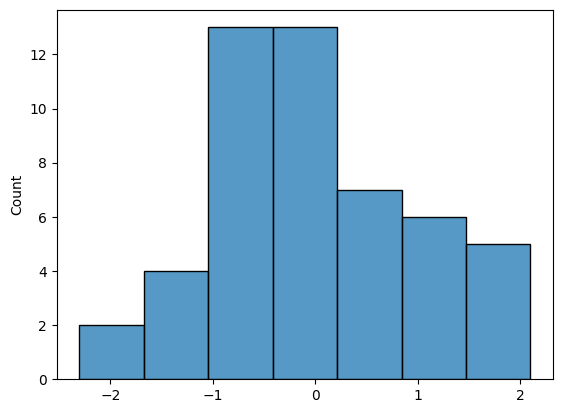

In [2]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import seaborn as sns # For plotting

# seed the random number generator
seed(1)
# generate univariate observations
data = randn(50)

# Histogram
sns.histplot(data)
plt.show()

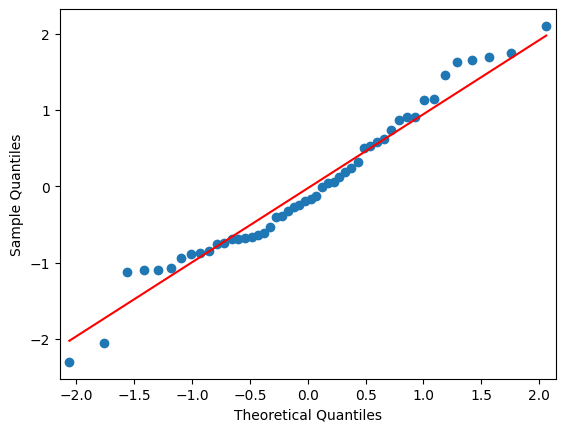

In [3]:
# q-q plot
qqplot(data, line='s')
plt.show()

### Normality hypothesis testing

#### Shapiro-Wilk Test
The Shapiro-Wilk test quantifies how likely a data sample was drawn from a Gaussian distribution. Considered to be a reliable test of normality, but especially for smaller samples of data (e.g. thousands of observations or less).

This test is implemented in the shapiro() function of the SciPy module. The function returns both the W-statistic calculated by the test and the p-value.

Check also: help(shapiro)

In [4]:
# import function
from scipy.stats import shapiro

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs with 3 decimal places
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.970, p=0.242
Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)


#### D’Agostino’s K<sup>2</sup> test 

Calculates kurtosis and skewness from the data to determine if the data distribution departs from the normal distribution.

The D’Agostino’s K<sup>2</sup> test is available via the normaltest() SciPy function and returns the test statistic and the p-value.

Check also: help(normaltest)

In [5]:
from scipy.stats import normaltest

# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.442, p=0.802
Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)


#### Kolmogorov-Smirnov normality test

This is a non-parametric test i.e., it has no assumption about the distribution of the data. Kolmogorov-Smirnov test is used to understand how well the distribution of sample data conforms to some theoretical distribution. 

In this, we compare between some theoretical cumulative distribution function, (Ft(x)), and a samples’ cumulative distribution function , (Fs(x)) where the sample is a random sample with unknown cumulative distribution function Fs(x):

H0: Fs(x) is equal to Ft(x) for all x from -inf. to inf.

HA: Fs(x) is not equal to Ft(x) for at least one x

The K-S test is implemented in the kstest() function of SciPy. In kstest function, the parameter “alternative” is used for the alternative hypothesis with default value of “two-sided” and for “args”, ‘norm’ option is given to compare. Again, we can conclude, all the variables are not normally distributed as p-value is 0 in all variables.

In [6]:
from scipy.stats import kstest

# K-S test
stat, p = kstest(data, 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.092, p=0.757
Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)


#### Anderson-Darling Test

A statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples (not only from normal distribution). The Anderson Darling test is one of the most powerful normality tests because it is less sensitive to outliers than other tests. However, it has a higher Type I error rate (rejection of the null hypothesis when it is actually true) than other normality tests.

It can be used to check whether a data sample comes from a normal distribution. The test is a modified version of the Kolmogorov-Smirnov test (K-S test). It gives more weight to the tails of the distribution than does the K-S test. 

The Anderson-Darling test returns a list of critical values rather than a single p-value. These correspond to percentage points of the distribution under the null hypothesis (for normal distribution: 15%, 10%, 5%, 2.5%, 1%). This can provide the basis for a more thorough interpretation of the result.

The Anderson-Darling test is implemented in SciPy in the anderson() function. It takes as parameters the data sample and the name of the distribution to test it against. By default, the test will check against the Gaussian distribution (dist=’norm’).

Check also: help(anderson)

In [8]:
from scipy.stats import anderson

# normality test
result = anderson(data)

print('Statistic: %.3f' % result.statistic)
print('critical values:', result.critical_values)
print('significance level (%):', result.significance_level)
print('Fit results:', result.fit_result)

p = 0
for i in range(len(result.critical_values)):
    slevel, cvalues = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (slevel, cvalues))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (slevel, cvalues))

Statistic: 0.571
critical values: [0.538 0.613 0.736 0.858 1.021]
significance level (%): [15.  10.   5.   2.5  1. ]
Fit results:   params: FitParams(loc=-0.02551484800765029, scale=0.9794330813507145)
 success: True
 message: '`anderson` successfully fit the distribution to the data.'
15.000: 0.538, data does not look normal (reject H0)
10.000: 0.613, data looks normal (fail to reject H0)
5.000: 0.736, data looks normal (fail to reject H0)
2.500: 0.858, data looks normal (fail to reject H0)
1.000: 1.021, data looks normal (fail to reject H0)


### References

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

https://towardsdatascience.com/methods-for-normality-test-with-application-in-python-bb91b49ed0f5